In [8]:
import pandas as pd

# Load the UK average temperature rises dataset
uk_temp_data_path = 'Temperature_monthly_averages_projected_2050_to_2079_6135036531832362639.csv'
uk_temp_data = pd.read_csv(uk_temp_data_path)

# Load the sea level rises dataset
sea_level_data_path = 'Sea_Level_2010_2100_1297724511733306717.csv'
sea_level_data = pd.read_csv(sea_level_data_path)

# Load the global max temperature rises dataset
global_temp_data_path = 'Monthly_Global_Max_Temperature_Projections_2040_2069_4785239679732641429.csv'
global_temp_data = pd.read_csv(global_temp_data_path)

# Display the first few rows of each dataset to understand their structure
uk_temp_data_head = uk_temp_data.head()
sea_level_data_head = sea_level_data.head()
global_temp_data_head = global_temp_data.head()

uk_temp_data_head, sea_level_data_head, global_temp_data_head

(   OBJECTID GRID_ID  tas December Median  tas January Median  \
 0         1  AG-103            11.151834            9.665514   
 1         2  AE-102            11.324389            9.857465   
 2         3  AF-102            11.007511            9.540879   
 3         4  AG-102            10.901828            9.446115   
 4         5  AF-101            10.963442            9.516730   
 
    tas February Median  tas March Median  tas April Median  tas May Median  \
 0             9.243093          9.083889         10.386477       13.088391   
 1             9.407131          9.263070         10.507829       13.113709   
 2             9.121625          8.989279         10.267606       12.947649   
 3             9.053901          8.934262         10.238348       12.959240   
 4             9.106355          9.015363         10.321368       12.985589   
 
    tas June Median  tas July Median  ...  tas April Upper  tas May Upper  \
 0        16.793013        20.211882  ...        10.774

In [4]:
# Preprocess the UK temperature data: Calculate annual averages from monthly data for 2050 to 2079
# Extract the columns for monthly median temperatures
monthly_median_columns = [col for col in uk_temp_data.columns if 'Median' in col and 'tas' in col]

# Calculate the annual averages for UK temperature data
uk_temp_data['Annual Avg Temp'] = uk_temp_data[monthly_median_columns].mean(axis=1)

# Since the data spans from 2050 to 2079, and we need to align this with decadal sea level data, let's extract for specific years
years_to_extract = [2050, 2060, 2070]  # Corresponding to the sea level measurement intervals
# Create a column for years assuming sequential monthly data from 2050 to 2079
uk_temp_data['Year'] = pd.date_range(start='2050-01-01', periods=len(uk_temp_data), freq='M').year

# Aggregate by year and average the temperatures for relevant years
uk_annual_temps = uk_temp_data[uk_temp_data['Year'].isin(years_to_extract)].groupby('Year')['Annual Avg Temp'].mean().reset_index()

uk_annual_temps

,Year,Annual Avg Temp
0,2050,13.918837
1,2060,13.502254
2,2070,13.647976


In [5]:
# Extracting sea level data for the years 2050, 2060, and 2070
sea_level_years = sea_level_data[['2050 seaLevelAnom', '2060 seaLevelAnom', '2070 seaLevelAnom']]

# Prepare the sea level data: Averaging sea levels across different scenarios for simplicity in this proof of concept
sea_level_years['2050 Avg Sea Level'] = sea_level_years['2050 seaLevelAnom'].mean()
sea_level_years['2060 Avg Sea Level'] = sea_level_years['2060 seaLevelAnom'].mean()
sea_level_years['2070 Avg Sea Level'] = sea_level_years['2070 seaLevelAnom'].mean()

# Create a DataFrame for sea level data corresponding to the specific years
sea_level_data_prepared = pd.DataFrame({
    'Year': [2050, 2060, 2070],
    'Avg Sea Level Anom': [
        sea_level_years['2050 Avg Sea Level'].iloc[0], 
        sea_level_years['2060 Avg Sea Level'].iloc[0], 
        sea_level_years['2070 Avg Sea Level'].iloc[0]
    ]
})

sea_level_data_prepared

/var/folders/8z/t81j5k7s439g56zzr67xscrr0000gp/T/ipykernel_82527/1143320869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea_level_years['2050 Avg Sea Level'] = sea_level_years['2050 seaLevelAnom'].mean()
/var/folders/8z/t81j5k7s439g56zzr67xscrr0000gp/T/ipykernel_82527/1143320869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea_level_years['2060 Avg Sea Level'] = sea_level_years['2060 seaLevelAnom'].mean()
/var/folders/8z/t81j5k7s439g56zzr67xscrr0000gp/T/ipykernel_82527/1143320869.py:7: Settin

,Year,Avg Sea Level Anom
0,2050,23.103682
1,2060,28.775625
2,2070,34.862067


In [6]:
# Merge the UK temperature data with the sea level data on the 'Year' column
merged_data = pd.merge(uk_annual_temps, sea_level_data_prepared, on='Year', how='inner')

# Display the merged data to ensure it's correctly aligned
merged_data

,Year,Annual Avg Temp,Avg Sea Level Anom
0,2050,13.918837,23.103682
1,2060,13.502254,28.775625
2,2070,13.647976,34.862067


In [14]:
# Assuming the global temperature dataset contains data from 2040 to 2069 sequentially by month
# Calculate the indices for years 2050, 2060, and using 2069 as 2070
indices_2050 = (2050 - 2040) * 12
indices_2060 = (2060 - 2040) * 12
indices_2069 = (2069 - 2040) * 12  # Using 2069's data for 2070

# Extract temperatures for 2050, 2060, and 2069 (as 2070), considering 12 months for each year
temps_2050 = global_temp_data.iloc[indices_2050:indices_2050 + 12]
temps_2060 = global_temp_data.iloc[indices_2060:indices_2060 + 12]
temps_2069 = global_temp_data.iloc[indices_2069:indices_2069 + 12]  # Using 2069 data as 2070

# Calculate the average temperatures for these years using median columns
global_median_columns = [col for col in global_temp_data.columns if 'Median' in col and 'tmax' in col]
avg_temp_2050 = temps_2050[global_median_columns].mean().mean()
avg_temp_2060 = temps_2060[global_median_columns].mean().mean()
avg_temp_2070 = temps_2069[global_median_columns].mean().mean()  # Average for 2069 used as 2070

# Create DataFrame for global temperatures
global_annual_temps_corrected = pd.DataFrame({
    'Year': [2050, 2060, 2070],
    'Annual Global Avg Temp': [avg_temp_2050, avg_temp_2060, avg_temp_2070]
})

# Merge the UK temperature data with the sea level data on the 'Year' column
merged_data = pd.merge(uk_annual_temps, sea_level_data_prepared, on='Year', how='inner')

# Now, let's merge the merged UK temperature and sea level data with the global temperature data
final_merged_data_corrected = pd.merge(merged_data, global_annual_temps_corrected, on='Year', how='inner', suffixes=('_UK', '_Global'))

# Display the final merged data to ensure it's correctly aligned
final_merged_data_corrected


,Year,Annual Avg Temp,Avg Sea Level Anom,Annual Global Avg Temp
0,2050,13.918837,23.103682,13.173916
1,2060,13.502254,28.775625,16.652743
2,2070,13.647976,34.862067,18.698142


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = final_merged_data_corrected[['Annual Avg Temp', 'Annual Global Avg Temp']]  # Input features
y = final_merged_data_corrected['Avg Sea Level Anom']  # Target variable

# Create a polynomial regression model with Ridge regularization
# Starting with a polynomial degree of 2 for initial testing
poly_degree = 2
model = make_pipeline(PolynomialFeatures(degree=poly_degree), Ridge(alpha=100))

# Fit the model
model.fit(X, y)

# Predict using the model (using the same inputs for simplicity in demonstration)
y_pred = model.predict(X)

# Calculate metrics to evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Output the model's MSE and R^2
mse, r2

(0.19691549822151044, 0.9914580704879232)

In [17]:
from sklearn.model_selection import LeaveOneOut

# Define the parameter grid
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4, 5],
    'ridge__alpha': [0.1, 1, 10, 100, 1000]
}

# Create a pipeline with polynomial features and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Use LeaveOneOut cross-validation
loo = LeaveOneOut()
grid_search = GridSearchCV(pipeline, param_grid, cv=loo, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X)

# Calculate metrics for the best model
mse_best = mean_squared_error(y, y_pred_best)
r2_best = r2_score(y, y_pred_best)

best_params, mse_best, r2_best


({'polynomialfeatures__degree': 5, 'ridge__alpha': 0.1},
 5.826211101600305e-26,
 1.0)

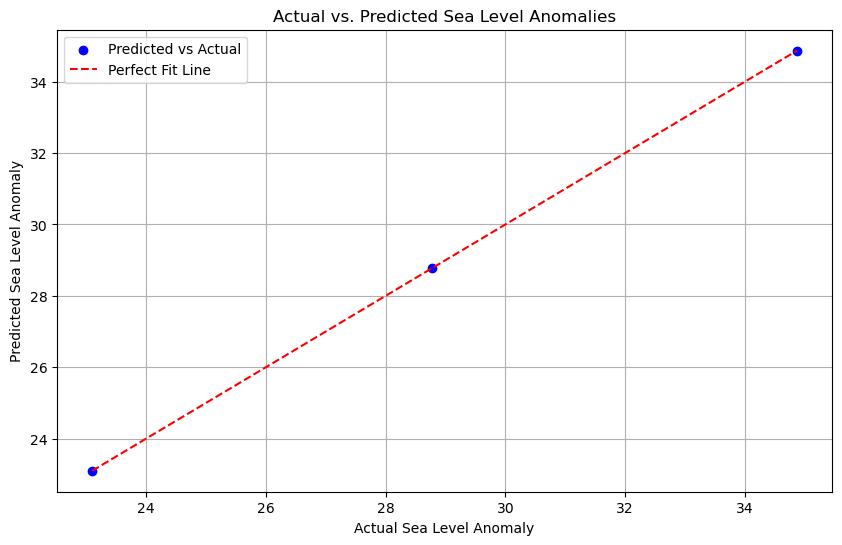

In [18]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_best, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual Sea Level Anomaly')
plt.ylabel('Predicted Sea Level Anomaly')
plt.title('Actual vs. Predicted Sea Level Anomalies')
plt.legend()
plt.grid(True)
plt.show()

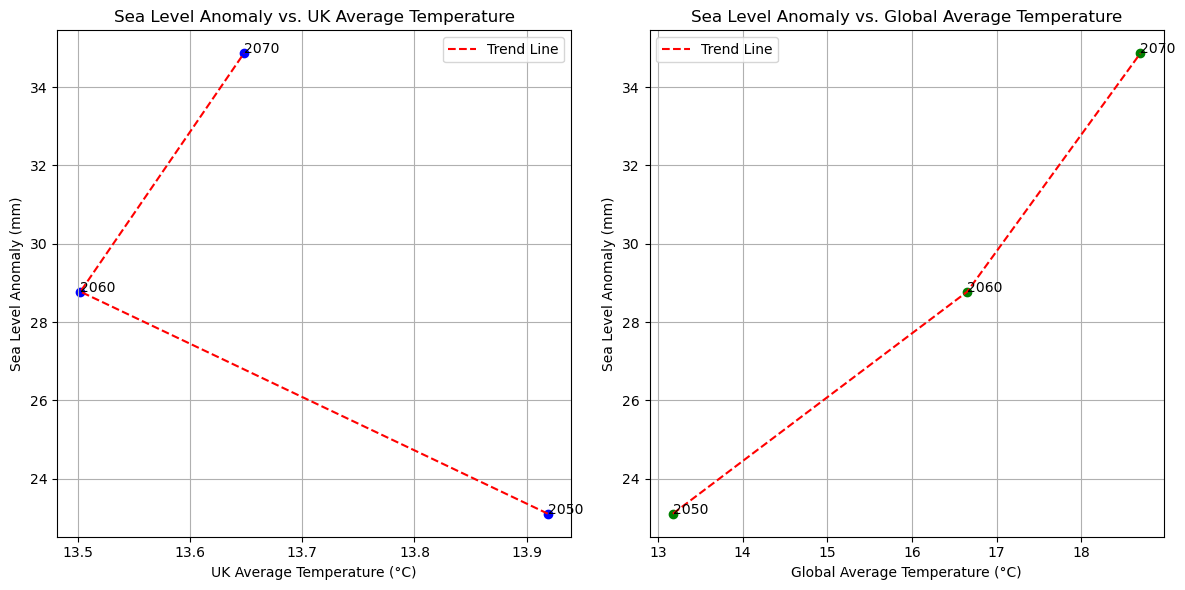

In [20]:
# Create a 2D scatter plot for Sea Level Anomaly vs. UK Average Temperature with years annotated
plt.figure(figsize=(12, 6))

# Subplot 1: Sea Level Anomaly vs. UK Average Temperature
plt.subplot(1, 2, 1)
plt.scatter(final_merged_data_corrected['Annual Avg Temp'], final_merged_data_corrected['Avg Sea Level Anom'], color='blue', marker='o')
plt.plot(final_merged_data_corrected['Annual Avg Temp'], y_pred_best, color='red', linestyle='--', label='Trend Line')
for i, year in enumerate(final_merged_data_corrected['Year']):
    plt.text(final_merged_data_corrected['Annual Avg Temp'][i], final_merged_data_corrected['Avg Sea Level Anom'][i], str(year))
plt.xlabel('UK Average Temperature (°C)')
plt.ylabel('Sea Level Anomaly (mm)')
plt.title('Sea Level Anomaly vs. UK Average Temperature')
plt.grid(True)
plt.legend()

# Subplot 2: Sea Level Anomaly vs. Global Average Temperature with years annotated
plt.subplot(1, 2, 2)
plt.scatter(final_merged_data_corrected['Annual Global Avg Temp'], final_merged_data_corrected['Avg Sea Level Anom'], color='green', marker='o')
plt.plot(final_merged_data_corrected['Annual Global Avg Temp'], y_pred_best, color='red', linestyle='--', label='Trend Line')
for i, year in enumerate(final_merged_data_corrected['Year']):
    plt.text(final_merged_data_corrected['Annual Global Avg Temp'][i], final_merged_data_corrected['Avg Sea Level Anom'][i], str(year))
plt.xlabel('Global Average Temperature (°C)')
plt.ylabel('Sea Level Anomaly (mm)')
plt.title('Sea Level Anomaly vs. Global Average Temperature')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



